In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv(r'C:\Users\Muhammad Luqman\Desktop\lab-4-21jzeleo444\2_Missing_Values_Filled.csv', parse_dates=['Datetime'], index_col='Datetime')

<AxesSubplot:>

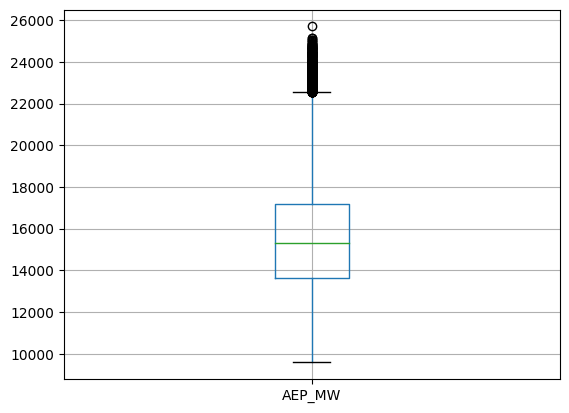

In [4]:
df.boxplot('AEP_MW')

In [5]:
def detect_outliers_iqr(data):
    outliers = []
    #data = sorted(data)
    q1 = data['AEP_MW'].quantile(0.25)
    q3 = data['AEP_MW'].quantile(0.75)
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    idx = 2
    idx_list = []
    for i in list(data['AEP_MW']): 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
            idx_list.append(idx)
        idx = idx + 1
    data.loc[data['AEP_MW'] < lwr_bound, 'AEP_MW'] = np.nan
    data.loc[data['AEP_MW'] > upr_bound, 'AEP_MW'] = np.nan
    return outliers, data, idx_list# Driver code

In [6]:
sample_outliers, p_data, index_of_out = detect_outliers_iqr(df)
print("Outliers from IQR method: ", sample_outliers)

Outliers from IQR method:  [22577.0, 22940.0, 22886.0, 22652.0, 22639.0, 22579.0, 22558.0, 22791.0, 23013.0, 22970.0, 22728.0, 23022.0, 23558.0, 23741.0, 22942.0, 22922.0, 23470.0, 23860.0, 24015.0, 23708.0, 23543.0, 22910.0, 22766.0, 22658.0, 23089.0, 23359.0, 23479.0, 23308.0, 22985.0, 22836.0, 23325.0, 23435.0, 23614.0, 23418.0, 23092.0, 22605.0, 22671.0, 22717.0, 22725.0, 22610.0, 22909.0, 23371.0, 23243.0, 23276.0, 23082.0, 22573.0, 22597.0, 23194.0, 23650.0, 23845.0, 23970.0, 23865.0, 23458.0, 22983.0, 22808.0, 22922.0, 23008.0, 22958.0, 23299.0, 23476.0, 23156.0, 22779.0, 23458.0, 24020.0, 24342.0, 24270.0, 24311.0, 24273.0, 24113.0, 23649.0, 23158.0, 22971.0, 23271.0, 23975.0, 24435.0, 24711.0, 24642.0, 24712.0, 24632.0, 24316.0, 23750.0, 23176.0, 23364.0, 23266.0, 23975.0, 24413.0, 24602.0, 24741.0, 24811.0, 24842.0, 24538.0, 23963.0, 23504.0, 23403.0, 22986.0, 23369.0, 23426.0, 23271.0, 22894.0, 22920.0, 22566.0, 22578.0, 23199.0, 23257.0, 23395.0, 23188.0, 22857.0, 22591.0, 

In [7]:
pd.isnull(p_data['AEP_MW']).sum()

666

In [8]:
index_of_out

[1930,
 2625,
 2626,
 2769,
 2770,
 6473,
 6474,
 7048,
 7049,
 7050,
 7051,
 7142,
 7143,
 7144,
 7145,
 7166,
 7167,
 7168,
 7169,
 7170,
 7171,
 7172,
 7314,
 7315,
 7336,
 7337,
 7338,
 7339,
 7340,
 7359,
 7360,
 7361,
 7362,
 7363,
 7364,
 7383,
 7384,
 7385,
 7386,
 7387,
 7575,
 7576,
 7577,
 7578,
 7579,
 10689,
 15710,
 15711,
 15712,
 15713,
 15714,
 15715,
 15716,
 15717,
 15736,
 15737,
 15738,
 15760,
 15761,
 15762,
 15763,
 15764,
 16046,
 16047,
 16048,
 16049,
 16050,
 16051,
 16052,
 16053,
 16054,
 16055,
 16069,
 16070,
 16071,
 16072,
 16073,
 16074,
 16075,
 16076,
 16077,
 16078,
 16079,
 16093,
 16094,
 16095,
 16096,
 16097,
 16098,
 16099,
 16100,
 16101,
 16102,
 16103,
 16118,
 16119,
 16120,
 16121,
 16215,
 16216,
 16217,
 20457,
 20577,
 20578,
 20579,
 20580,
 20581,
 20582,
 20588,
 20589,
 20590,
 20591,
 20592,
 20599,
 20600,
 20601,
 20602,
 20603,
 20604,
 20605,
 20611,
 20612,
 20613,
 20614,
 20649,
 20650,
 20651,
 20662,
 20672,
 20673,
 2067

In [9]:
df['AEP_MW'].interpolate(method='time',inplace=True)

In [10]:
pd.isnull(p_data['AEP_MW']).sum()

0

In [11]:
p_data.reset_index(inplace=True)

In [12]:
p_data.to_csv(r'C:\Users\Muhammad Luqman\Desktop\lab-4-21jzeleo444\3_Outlier_Identified.csv',index=False)